In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [3]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:

from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['species'] = encoder.fit_transform(df['species'])

In [9]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [12]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

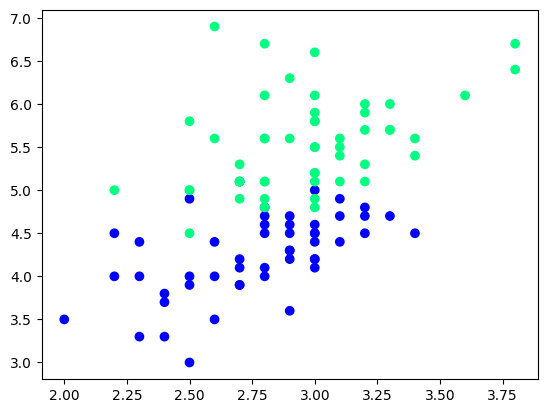

In [15]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [17]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [18]:
df_train

,sepal_width,petal_length,species
99,2.8,4.1,1
148,3.4,5.4,2
103,2.9,5.6,2
100,3.3,6.0,2
107,2.9,6.3,2
64,2.9,3.6,1
56,3.3,4.7,1
69,2.5,3.9,1
71,2.8,4.0,1
77,3.0,5.0,1


In [19]:
df_val

,sepal_width,petal_length,species
62,2.2,4.0,1
88,3.0,4.1,1
139,3.1,5.4,2
126,2.8,4.8,2
95,3.0,4.2,1


In [20]:
df_test

,sepal_width,petal_length,species
60,2.0,3.5,1
97,2.9,4.3,1
79,2.6,3.5,1
90,2.6,4.4,1
117,3.8,6.7,2


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
y_test

array([1, 1, 2, 2, 1])

**Case 1:Bagging**

In [30]:
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
148,3.4,5.4,2
64,2.9,3.6,1
100,3.3,6.0,2
100,3.3,6.0,2
107,2.9,6.3,2
71,2.8,4.0,1
64,2.9,3.6,1
77,3.0,5.0,1


In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [45]:
dt_bag1 = DecisionTreeClassifier()

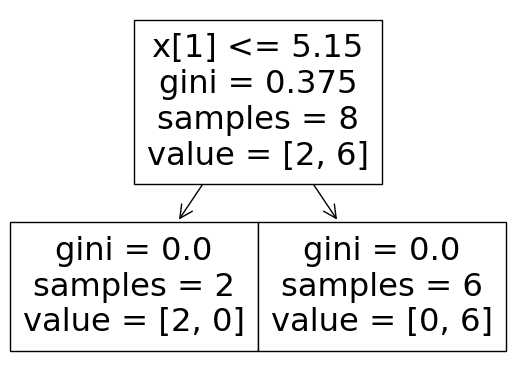

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


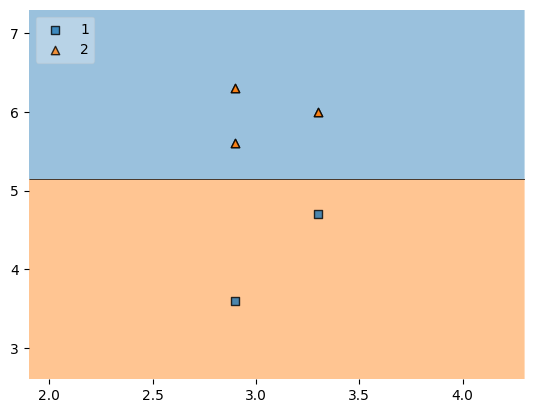

In [47]:
evaluate(dt_bag1,X,y)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
107,2.9,6.3,2
99,2.8,4.1,1
77,3.0,5.0,1
100,3.3,6.0,2
71,2.8,4.0,1
56,3.3,4.7,1
148,3.4,5.4,2
64,2.9,3.6,1


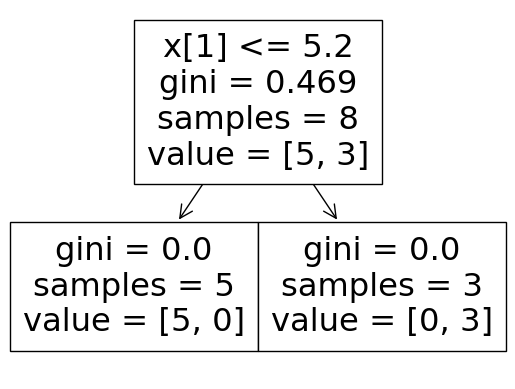

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


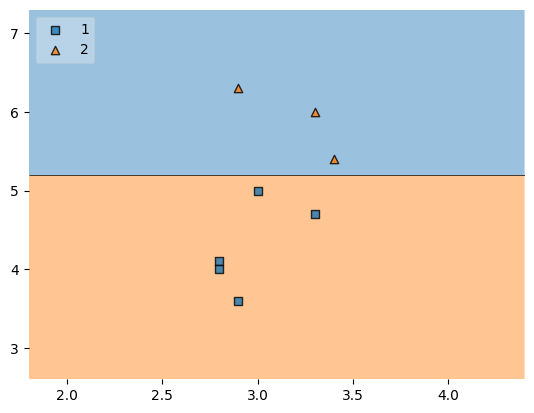

In [49]:

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
69,2.5,3.9,1
103,2.9,5.6,2
56,3.3,4.7,1
69,2.5,3.9,1
77,3.0,5.0,1
107,2.9,6.3,2
69,2.5,3.9,1
100,3.3,6.0,2


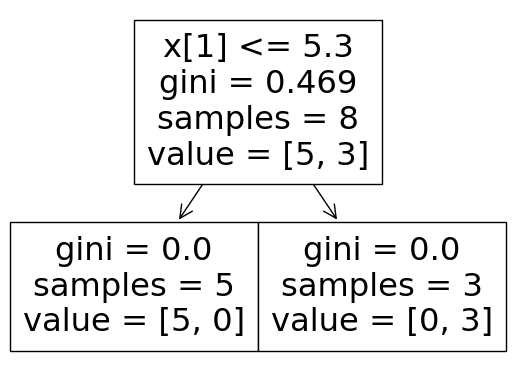

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


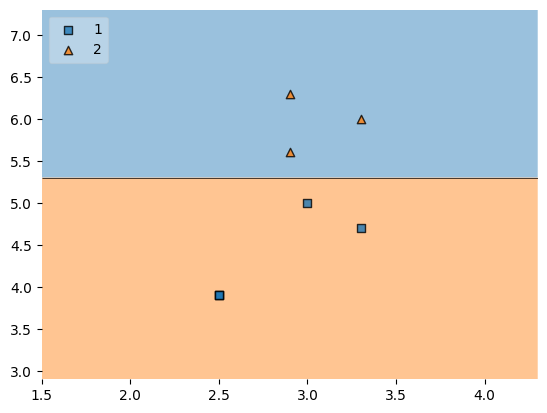

In [51]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [46]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

**Prediction**

In [52]:
df_test

,sepal_width,petal_length,species
60,2.0,3.5,1
97,2.9,4.3,1
79,2.6,3.5,1
90,2.6,4.4,1
117,3.8,6.7,2


In [53]:
print("Prediction 1",dt_bag1.predict(np.array([2.0,3.5]).reshape(1,2)))
print("Prediction 1",dt_bag1.predict(np.array([2.9,4.3]).reshape(1,2)))
print("Prediction 1",dt_bag1.predict(np.array([3.8,6.7]).reshape(1,2)))

Prediction 1 [1]
Prediction 1 [1]
Prediction 1 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Pasting(Row sampling)**

In [54]:

# Row sampling without replacement
df_train

,sepal_width,petal_length,species
99,2.8,4.1,1
148,3.4,5.4,2
103,2.9,5.6,2
100,3.3,6.0,2
107,2.9,6.3,2
64,2.9,3.6,1
56,3.3,4.7,1
69,2.5,3.9,1
71,2.8,4.0,1
77,3.0,5.0,1


In [55]:
df_train.sample(8)

,sepal_width,petal_length,species
99,2.8,4.1,1
103,2.9,5.6,2
71,2.8,4.0,1
56,3.3,4.7,1
64,2.9,3.6,1
148,3.4,5.4,2
69,2.5,3.9,1
107,2.9,6.3,2


**Random Subspaces**

In [61]:
#Column Sampling

df1 = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df1 = df1.sample(10)


In [62]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor
12,4.8,3.0,1.4,0.1,setosa
115,6.4,3.2,5.3,2.3,virginica
22,4.6,3.6,1.0,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica
46,5.1,3.8,1.6,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
36,5.5,3.5,1.3,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
85,6.0,3.4,4.5,1.6,versicolor


In [73]:

df1.sample(2,replace=True,axis=1)  #Column sample

,species,petal_length
89,versicolor,4.0
12,setosa,1.4
115,virginica,5.3
22,setosa,1.0
116,virginica,5.5
46,setosa,1.6
59,versicolor,3.9
36,setosa,1.3
31,setosa,1.5
85,versicolor,4.5


**Random Patches(Both columns and rows)**

In [74]:

df1

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor
12,4.8,3.0,1.4,0.1,setosa
115,6.4,3.2,5.3,2.3,virginica
22,4.6,3.6,1.0,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica
46,5.1,3.8,1.6,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
36,5.5,3.5,1.3,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
85,6.0,3.4,4.5,1.6,versicolor


In [76]:

df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_width,petal_width
85,1.6,1.6
89,1.3,1.3
89,1.3,1.3
116,1.8,1.8
31,0.4,0.4
85,1.6,1.6
89,1.3,1.3
36,0.2,0.2
